# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

query_url=f"{url}&q="

city_ID_list = []
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

record_counter=0
set_counter=1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        response=requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])

        if record_counter == 50:
            record_counter = 1
            set_counter = set_counter +1

        else:
            record_counter = record_counter +1
            
        print(f"Processing Record {record_counter} of Set {set_counter} | {city}")

    except:
        print("City was not found")

print("--------------Data Retrieval Complete---------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | victoria
Processing Record 4 of Set 1 | stepnyak
Processing Record 5 of Set 1 | grenfell
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | dhanera
Processing Record 9 of Set 1 | kapaa
City was not found
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | goundi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | broome
Processing Record 20 of Set 1 | peniche
Processing Record 21 of Set 1 | teeli
City was not found
Processing Record 22 of Set 1 | takapau
Processing Record 23 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data = ({"City": city_list, 
    "Lat": lat_list,
    "Lng":lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list,
})

weather_df=pd.DataFrame(weather_data)
weather_df.head()

weather_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,21.824515,21.649522,48.222676,73.073944,60.230634,8.127183,1.673922e+09
std,32.797605,90.882789,32.452830,19.968622,40.575898,5.735928,9.776408e+01
min,-54.800000,-175.200000,-61.080000,16.000000,0.000000,0.000000,1.673922e+09
25%,-2.895400,-59.520850,32.485000,63.750000,15.000000,3.812500,1.673922e+09
50%,27.764850,23.886300,57.255000,76.000000,75.000000,6.910000,1.673922e+09
75%,48.462550,103.960625,73.180000,88.000000,100.000000,11.415000,1.673922e+09
max,78.218600,179.316700,106.450000,100.000000,100.000000,38.070000,1.673922e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [11]:

weather_df['Date'] = weather_df['Date'].astype('datetime64[ns]')
weather_df.dtypes

City                  object
Lat                  float64
Lng                  float64
Max Temp             float64
Humidity               int64
Cloudiness             int64
Wind Speed           float64
Country               object
Date          datetime64[ns]
dtype: object

In [12]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.53,77,0,14.97,US,1970-01-01 00:00:01.673921929
1,Katsuura,35.1333,140.3000,47.64,60,95,9.22,JP,1970-01-01 00:00:01.673922129
2,Hong Kong,22.2855,114.1577,57.33,78,100,11.01,HK,1970-01-01 00:00:01.673922105
3,Stepnyak,52.8339,70.7803,10.65,80,100,7.63,KZ,1970-01-01 00:00:01.673922130
4,Grenfell,-33.9000,148.1667,91.29,20,0,4.03,AU,1970-01-01 00:00:01.673922130
...,...,...,...,...,...,...,...,...,...
563,Anderson,34.5334,-82.6499,52.34,58,0,3.44,US,1970-01-01 00:00:01.673922225
564,Hualmay,-11.0964,-77.6139,70.36,77,96,8.28,PE,1970-01-01 00:00:01.673922369
565,Nālūt,30.3333,10.8500,46.13,40,0,9.17,LY,1970-01-01 00:00:01.673922101
566,Najrān,17.4924,44.1277,59.65,69,41,5.57,SA,1970-01-01 00:00:01.673922299


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

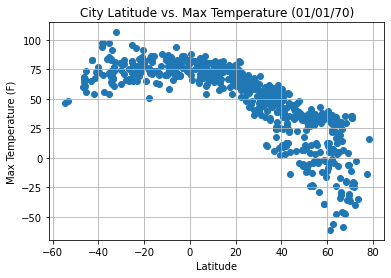

In [20]:
x_value = weather_df["Lat"]
y_value = weather_df["Max Temp"]

plt.scatter(x_value, y_value)
plt.title("City Latitude vs. Max Temperature (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../Images/LatitudeVsTemperature")
plt.show()

## Latitude vs. Humidity Plot

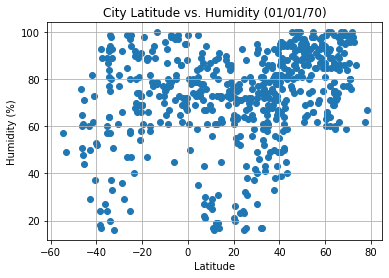

In [21]:
x_value = weather_df["Lat"]
y_value = weather_df["Humidity"]

plt.scatter(x_value, y_value)
plt.title("City Latitude vs. Humidity (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../Images/LatitudeVsHumidity")
plt.show()

## Latitude vs. Cloudiness Plot

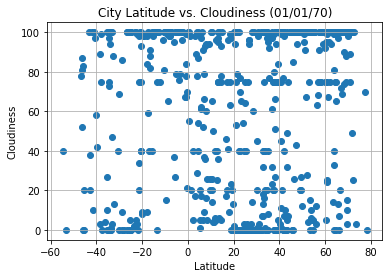

In [23]:
x_value = weather_df["Lat"]
y_value = weather_df["Cloudiness"]

plt.scatter(x_value, y_value)
plt.title("City Latitude vs. Cloudiness (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("../Images/LatitudeVsCloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

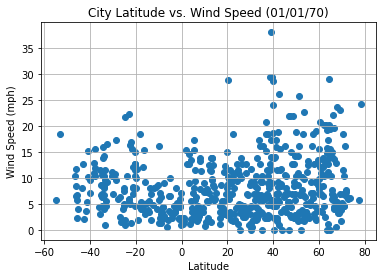

In [24]:
x_value = weather_df["Lat"]
y_value = weather_df["Wind Speed"]

plt.scatter(x_value, y_value)
plt.title("City Latitude vs. Wind Speed (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save scatterplot as png file
plt.savefig("../Images/LatitudeVsWind")
plt.show()

## Linear Regression

In [34]:
# Separate the plots into Northern Hemisphere and Southern Hemisphere 
north_df=weather_df.loc[weather_df["Lat"] > 0]
south_df=weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6870632486146272
The correlation between both factors is -1.34


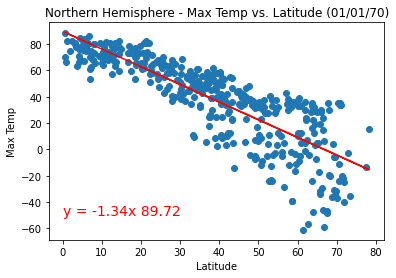

In [39]:
x_values = north_df["Lat"]
y_values = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (0,-50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/NorthHemTempVsLat")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.0705033762414136
The correlation between both factors is 0.19


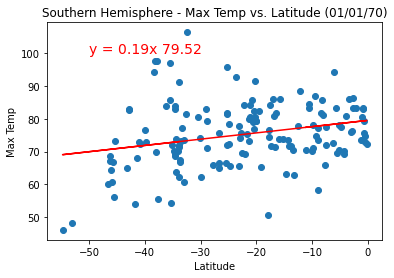

In [40]:
x_values = south_df["Lat"]
y_values = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_equation, (-50,100), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/SouthHemTempVsLat")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18256730544579725
The correlation between both factors is 0.43


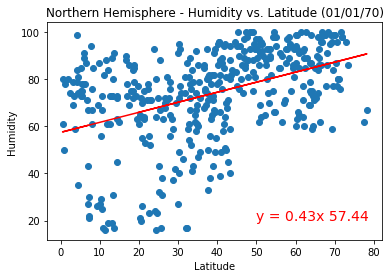

In [45]:
x_values = north_df["Lat"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Humidity vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (50,20), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/NorthHemHumidVsLat")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15322920738708676
The correlation between both factors is 0.58


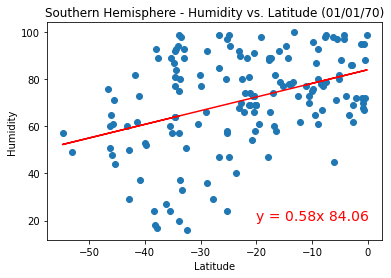

In [46]:
x_values = south_df["Lat"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Humidity vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_equation, (-20,20), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/SouthHemHumidVsLat")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.060692562944766125
The correlation between both factors is 0.5


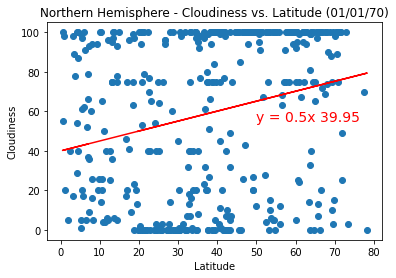

In [50]:
x_values = north_df["Lat"]
y_values = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (50,55), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/NorthHemCloudVsLat")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13450839860337402
The correlation between both factors is 1.09


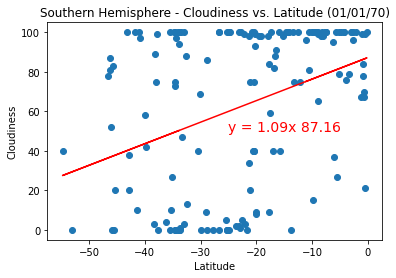

In [53]:
x_values = south_df["Lat"]
y_values = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_equation, (-25,50), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/SouthHemCloudVsLat")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.034047299888413554
The correlation between both factors is 0.06


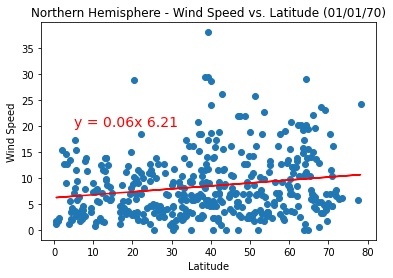

In [57]:
x_values = north_df["Lat"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (5,20), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/NorthHemWindVsLat")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11325675694780163
The correlation between both factors is -0.11


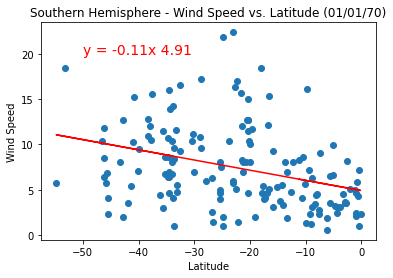

In [60]:
x_values = south_df["Lat"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (01/01/70)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_equation, (-50,20), fontsize=14, color="red")

print(f"The r-value is: {rvalue**2}")
correlation=linregress(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig("../Images/SouthHemWindVsLat")
plt.show()